In [325]:
from PIL import Image
import os, glob, sys, numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras import losses
from keras import backend as K 
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam
from keras import metrics
from sklearn.metrics import r2_score
from math import log
from keras import models, layers, optimizers  
from keras.optimizers import SGD       

img_dir = './data'
categories = ['train', 'validation']
np_classes = len(categories)

image_w = 64
image_h = 64


np.random.seed(0)
pixel = image_h * image_w * 3

X = [] # X는 우리가 알수있는 데이터.
y = [] # X로 예측하고 싶은 데이터. 정답
filenames = []
for idx, cat in enumerate(categories):
    img_dir_detail = img_dir + "/" + cat
    files = glob.glob(img_dir_detail+"/*/"+ "*.jpg")


    for i, f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert("RGB")
            img = img.resize((image_w, image_h))
            data = np.asarray(img)
           
            filenames.append(f)
            file_token=filenames[i].split("_")[1]    
            n = float(file_token)
              
            X.append(data)
            y.append(n)
            
            if i % 1000 == 0:
                print(cat, " :\t", filenames[i]+ "    \t" , y[i])    
                
        except:
            print(cat, str(i)+" 번째에서 에러 ")
X = np.array(X)
Y = np.array(y)# 명시적으로 자료타입 알려줌. 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

xy = (X_train, X_test, Y_train, Y_test)
np.save("./numpy_data/binary_image_data.npy", xy)

X_train, X_test, y_train, y_test = np.load('./numpy_data/binary_image_data.npy')
X_train = X_train.astype('float32') / 255  # 예측값
X_test = X_test.astype('float32') / 255

print(X_train.shape)
print(X_train.shape[0])
print(np.bincount(y_train))
print(np.bincount(y_test))

train  :	 ./data/train/Topology/22_0.0005_0.jpg    	 0.0005
train  :	 ./data/train/Topology/161_0.005_0.jpg    	 0.005
train  :	 ./data/train/Topology/541_0.0005_0.2.jpg    	 0.0005
train  :	 ./data/train/Topology/237_0.005_0.4.jpg    	 0.005
train  :	 ./data/train/Topology/411_0.005_0.1.jpg    	 0.005
train  :	 ./data/train/Topology/600_0.0005_0.3.jpg    	 0.0005
train  :	 ./data/train/Topology/58_0.0005_0.4.jpg    	 0.0005
train  :	 ./data/train/Topology/171_0.05_0.1.jpg    	 0.05
train  :	 ./data/train/Topology/164_0.0001_0.2.jpg    	 0.0001
train  :	 ./data/train/Topology/145_0.0005_0.4.jpg    	 0.0005
train  :	 ./data/train/Topology/62_0.1_0.1.jpg    	 0.1
train  :	 ./data/train/Topology/551_0.1_0.jpg    	 0.1
train  :	 ./data/train/Topology/473_0.0001_0.3.jpg    	 0.0001
train  :	 ./data/train/Topology/197_0.01_0.jpg    	 0.01
train  :	 ./data/train/Topology/171_0.0001_0.1.jpg    	 0.0001
train  :	 ./data/train/Topology/72_0.1_0.2.jpg    	 0.1
train  :	 ./data/train/Topology/190_

In [363]:
Y_train = Y_train.astype('float32') / 255  # 실제값
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32') / 255
Y_test = Y_test.astype('float32')

droprate=0.25


model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=(64,64,3), activation="relu")) 
model.add(BatchNormalization())
model.add(Dropout(droprate))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(droprate))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(droprate))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))  
model.add(Flatten())
model.add(Dense(256, activation="relu")) # 256 임의의 수. 256개 입력받아 1개의 출력. 여러 수치 시도해 볼 것!
model.add(BatchNormalization())
model.add(Dense(1))
 
def mse(y_true, y_pred):
    return K.mean(K.square(K.log(y_pred) -  K.log(y_true)), axis=-1)
     
model.compile(loss= 'mean_squared_error', optimizer='adam', metrics=[mse])

    
model_dir = './model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
model_path = model_dir + "/cnn_regression_classify.model"
    
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=7)


In [364]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_365 (Conv2D)          (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_457 (Bat (None, 64, 64, 32)        128       
_________________________________________________________________
dropout_365 (Dropout)        (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_365 (MaxPoolin (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_366 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_458 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_366 (MaxPoolin (None, 16, 16, 32)        0         
__________

In [365]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 12352 samples, validate on 3088 samples
Epoch 1/100
12352/12352 [==============================] - 48s 4ms/step - loss: 0.3294 - mean_squared_error: 0.3294 - val_loss: 0.0035 - val_mean_squared_error: 0.0035

Epoch 00001: val_loss improved from inf to 0.00351, saving model to ./model/cnn_regression_classify.model
Epoch 2/100
12352/12352 [==============================] - 7s 575us/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00002: val_loss improved from 0.00351 to 0.00166, saving model to ./model/cnn_regression_classify.model
Epoch 3/100
12352/12352 [==============================] - 7s 579us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0013 - val_mean_squared_error: 0.0013

Epoch 00003: val_loss improved from 0.00166 to 0.00132, saving model to ./model/cnn_regression_classify.model
Epoch 4/100
12352/12352 [==============================] - 7s 576us/step - loss: 0.0047 - mean_squared_error: 0.0047

In [ ]:
test_loss = model.evaluate(X_test, y_test)

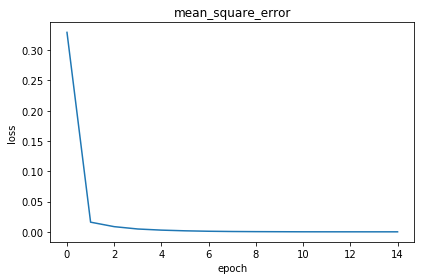

In [368]:
plt.plot(history.history['loss'], label="mean_square_error")
plt.title("mean_square_error")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.tight_layoumodel.predict(X)t()
plt.show()